In [205]:
import math
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model
from IPython.display import display
import seaborn as sns
import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [206]:
#import and view dataset 
df = pd.read_csv('NEW_YORK_Offenses.csv')
df.head(10)

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,"1,861",0,0.000,nan,0,0,0,12,2,10,0,0.000
1,Addison Town and Village,"2,577",3,0.000,nan,0,0,3,24,3,20,1,0.000
2,Akron Village,"2,846",3,0.000,nan,0,0,3,16,1,15,0,0.000
3,Albany,"97,956",791,8.000,nan,30,227,526,"4,090",705,"3,243",142,nan
4,Albion Village,"6,388",23,0.000,nan,3,4,16,223,53,165,5,nan
5,Alfred Village,"4,089",5,0.000,nan,0,3,2,46,10,36,0,nan
6,Allegany Village,"1,781",3,0.000,nan,0,0,3,10,0,10,0,0.000
7,Amherst Town,"118,296",107,1.000,nan,7,31,68,"2,118",204,"1,882",32,3.000
8,Amityville Village,"9,519",9,0.000,nan,2,4,3,210,16,188,6,1.000
9,Amsterdam,"18,182",30,0.000,nan,0,12,18,405,99,291,15,0.000


In [207]:
df.columns

Index(['City', 'Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter',
       'Rape\n(revised\ndefinition)1', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary',
       'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'Arson3'],
      dtype='object')

In [208]:
df.fillna(0, inplace=True)
for col in df.iloc[:, 1:]:
    df[col] = df[col].replace('[^0-9]+', '', regex=True)
    df[col] = df[col].astype('int64')

In [209]:
df.head(10)

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861,0,0,0,0,0,0,12,2,10,0,0
1,Addison Town and Village,2577,3,0,0,0,0,3,24,3,20,1,0
2,Akron Village,2846,3,0,0,0,0,3,16,1,15,0,0
3,Albany,97956,791,8,0,30,227,526,4090,705,3243,142,0
4,Albion Village,6388,23,0,0,3,4,16,223,53,165,5,0
5,Alfred Village,4089,5,0,0,0,3,2,46,10,36,0,0
6,Allegany Village,1781,3,0,0,0,0,3,10,0,10,0,0
7,Amherst Town,118296,107,1,0,7,31,68,2118,204,1882,32,3
8,Amityville Village,9519,9,0,0,2,4,3,210,16,188,6,1
9,Amsterdam,18182,30,0,0,0,12,18,405,99,291,15,0


#### Propertycrime=α+Population+Population2+Murder+Robbery

In [210]:
#rename columns for ease of reference
df.rename(columns={'City':'city','Violent\ncrime': 'violent_crime', 'Rape\n(revised\ndefinition)1': 'rape1', 'Rape\n(legacy\ndefinition)2': 'rape2', 'Aggravated\nassault': 'assault','Population': 'population', 'Murder and\nnonnegligent\nmanslaughter':'murder','Robbery': 'robbery','Property\ncrime': 'property_crime','Burglary':'burglary','Larceny-\ntheft': 'larceny_theft', 'Motor\nvehicle\ntheft': 'motor_vehicle_theft', 'Arson3':'arson'}, inplace=True)
df.head(10)

,city,population,violent_crime,murder,rape1,rape2,robbery,assault,property_crime,burglary,larceny_theft,motor_vehicle_theft,arson
0,Adams Village,1861,0,0,0,0,0,0,12,2,10,0,0
1,Addison Town and Village,2577,3,0,0,0,0,3,24,3,20,1,0
2,Akron Village,2846,3,0,0,0,0,3,16,1,15,0,0
3,Albany,97956,791,8,0,30,227,526,4090,705,3243,142,0
4,Albion Village,6388,23,0,0,3,4,16,223,53,165,5,0
5,Alfred Village,4089,5,0,0,0,3,2,46,10,36,0,0
6,Allegany Village,1781,3,0,0,0,0,3,10,0,10,0,0
7,Amherst Town,118296,107,1,0,7,31,68,2118,204,1882,32,3
8,Amityville Village,9519,9,0,0,2,4,3,210,16,188,6,1
9,Amsterdam,18182,30,0,0,0,12,18,405,99,291,15,0


In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 13 columns):
city                   351 non-null object
population             351 non-null int64
violent_crime          351 non-null int64
murder                 351 non-null int64
rape1                  351 non-null int64
rape2                  351 non-null int64
robbery                351 non-null int64
assault                351 non-null int64
property_crime         351 non-null int64
burglary               351 non-null int64
larceny_theft          351 non-null int64
motor_vehicle_theft    351 non-null int64
arson                  351 non-null int64
dtypes: int64(12), object(1)
memory usage: 34.3+ KB


In [212]:
#create column
df['population2'] = np.power(df['population'], 2)
df.head(10)

,city,population,violent_crime,murder,rape1,rape2,robbery,assault,property_crime,burglary,larceny_theft,motor_vehicle_theft,arson,population2
0,Adams Village,1861,0,0,0,0,0,0,12,2,10,0,0,3463321
1,Addison Town and Village,2577,3,0,0,0,0,3,24,3,20,1,0,6640929
2,Akron Village,2846,3,0,0,0,0,3,16,1,15,0,0,8099716
3,Albany,97956,791,8,0,30,227,526,4090,705,3243,142,0,9595377936
4,Albion Village,6388,23,0,0,3,4,16,223,53,165,5,0,40806544
5,Alfred Village,4089,5,0,0,0,3,2,46,10,36,0,0,16719921
6,Allegany Village,1781,3,0,0,0,0,3,10,0,10,0,0,3171961
7,Amherst Town,118296,107,1,0,7,31,68,2118,204,1882,32,3,13993943616
8,Amityville Village,9519,9,0,0,2,4,3,210,16,188,6,1,90611361
9,Amsterdam,18182,30,0,0,0,12,18,405,99,291,15,0,330585124


In [213]:
#create the three categorical variables 
df['murder'] = np.where((df['murder'] > 0), 1, 0) 
df['robbery'] = np.where((df['robbery'] > 0), 1, 0)  
df.head(10)

,city,population,violent_crime,murder,rape1,rape2,robbery,assault,property_crime,burglary,larceny_theft,motor_vehicle_theft,arson,population2
0,Adams Village,1861,0,0,0,0,0,0,12,2,10,0,0,3463321
1,Addison Town and Village,2577,3,0,0,0,0,3,24,3,20,1,0,6640929
2,Akron Village,2846,3,0,0,0,0,3,16,1,15,0,0,8099716
3,Albany,97956,791,1,0,30,1,526,4090,705,3243,142,0,9595377936
4,Albion Village,6388,23,0,0,3,1,16,223,53,165,5,0,40806544
5,Alfred Village,4089,5,0,0,0,1,2,46,10,36,0,0,16719921
6,Allegany Village,1781,3,0,0,0,0,3,10,0,10,0,0,3171961
7,Amherst Town,118296,107,1,0,7,1,68,2118,204,1882,32,3,13993943616
8,Amityville Village,9519,9,0,0,2,1,3,210,16,188,6,1,90611361
9,Amsterdam,18182,30,0,0,0,1,18,405,99,291,15,0,330585124


In [214]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = df['property_crime']
X = df[['population','population2','murder','robbery']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [ 3.46489427e-02 -2.11012230e-09  1.53973792e+01 -9.84856670e+01]

Intercept: 
 -107.22575522520583

R-squared:
0.996123334982826


We have a very high  R2 value (close to 1), which is a warning sign for overfitting. Seems like our dataset is biased by quirks in the data, and will perform less well on the test-set.

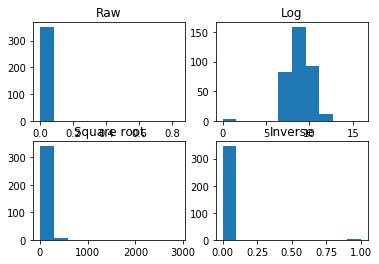

In [215]:
#check for normal distribution amongst continous variables 
fig = plt.figure()

fig.add_subplot(221)
plt.hist(df['population'].dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(df['population']+1))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(df['population'].dropna()))
plt.title('Square root')

ax3=fig.add_subplot(224)
plt.hist(1/(df['population']+1))
plt.title('Inverse')
plt.show()

#we'll take the log for population instead 

df['population'] = (np.log(df['population']+1))

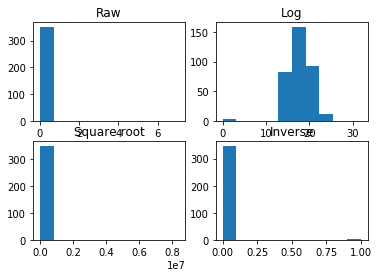

In [216]:
fig = plt.figure()

fig.add_subplot(221)
plt.hist(df['population2'].dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(df['population2']+1))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(df['population2'].dropna()))
plt.title('Square root')

ax3=fig.add_subplot(224)
plt.hist(1/(df['population2']+1))
plt.title('Inverse')
plt.show()

#take log of population sqrd 
df['population2'] = (np.log(df['population2']+1))

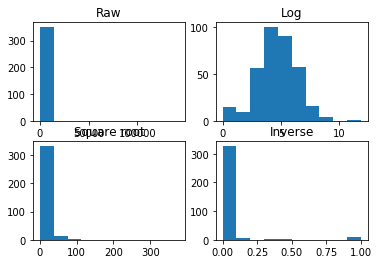

In [217]:
fig = plt.figure()

fig.add_subplot(221)
plt.hist(df['property_crime'].dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(df['property_crime']+1))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(df['property_crime'].dropna()))
plt.title('Square root')

ax3=fig.add_subplot(224)
plt.hist(1/(df['property_crime']+1))
plt.title('Inverse')
plt.show()

#finally take the log of property crime
df['property_crime'] = (np.log(df['property_crime']+1))

In [218]:
# re-instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = df['property_crime']
X = df[['population','population2','murder','robbery']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [-1.17118328e+03  5.85906324e+02  5.30171638e-01  9.02991711e-01]

Intercept: 
 -1.2279069404393717

R-squared:
0.8038292094596475


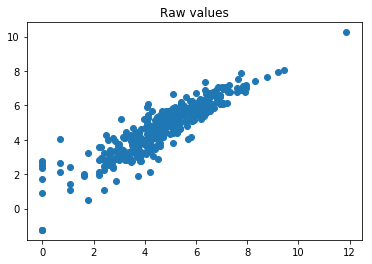

In [219]:
#check for assumption 1, linear relationships 
outcome = Y
predicted = regr.predict(X).ravel()

plt.scatter(outcome, predicted)
plt.title('Raw values')
plt.show()

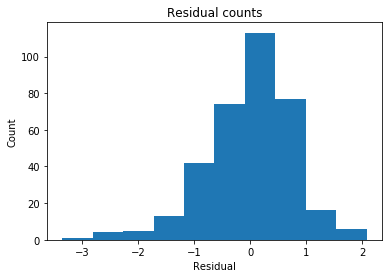

In [220]:
#check assumption 2, multivariate normality 
residual = outcome - predicted

# looks pretty good! 
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

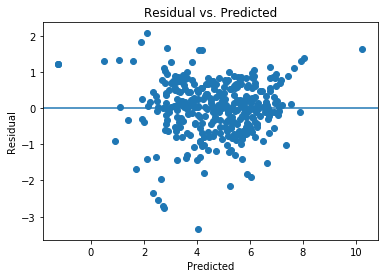

In [221]:
#check assumption three homoscedasticity  
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()


In [222]:
#assumption #4, low multicollinearity
correlation_matrix = X.corr()
display(correlation_matrix)
#looks like population and population 2 are a little to correlated, lets remove one and then re-initiate the model 

,population,population2,murder,robbery
population,1.000,1.000,0.439,0.544
population2,1.000,1.000,0.439,0.544
murder,0.439,0.439,1.000,0.315
robbery,0.544,0.544,0.315,1.000


In [223]:
# re-instantiate and fit our model (tried both population and population sqrd, higher r-squared value in keeping population over population sqrd)
regr = linear_model.LinearRegression()
Y = df['property_crime']
X = df[['population','murder','robbery']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [0.73274985 0.52008316 1.08121282]

Intercept: 
 -2.530994923356105

R-squared:
0.7836668825597868


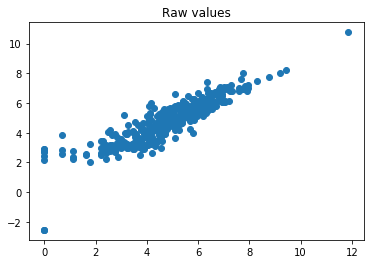

In [224]:
outcome = Y
predicted = regr.predict(X).ravel()

plt.scatter(outcome, predicted)
plt.title('Raw values')
plt.show()

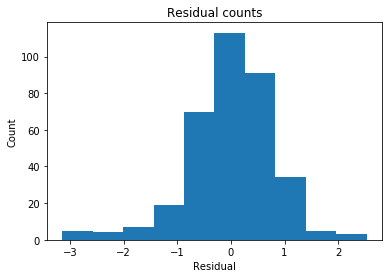

In [225]:
residual = outcome - predicted

# looks pretty good! 
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

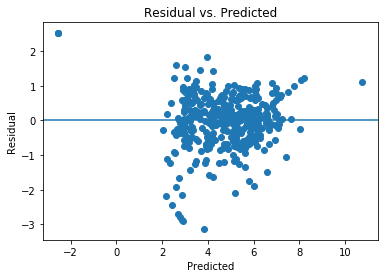

In [226]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [227]:
correlation_matrix = X.corr()
display(correlation_matrix)

,population,murder,robbery
population,1.000,0.439,0.544
murder,0.439,1.000,0.315
robbery,0.544,0.315,1.000
